In [ ]:
#Задача проекта проведение разведывательного анализа данных, состовление отчета по его резульатам, для дальнейшего построения модели.

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок
df = pd.read_csv('stud_math.xls')
df.columns = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures',
              'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'granular', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score']
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [3]:
# Рассмотрим, какие данные хранятся в файле и какие типы данных у столбцов:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     378 non-null    object 
 4   famsize     368 non-null    object 
 5   Pstatus     350 non-null    object 
 6   Medu        392 non-null    float64
 7   Fedu        371 non-null    float64
 8   Mjob        376 non-null    object 
 9   Fjob        359 non-null    object 
 10  reason      378 non-null    object 
 11  guardian    364 non-null    object 
 12  traveltime  367 non-null    float64
 13  studytime   388 non-null    float64
 14  failures    373 non-null    float64
 15  schoolsup   386 non-null    object 
 16  famsup      356 non-null    object 
 17  paid        355 non-null    object 
 18  activities  381 non-null    object 
 19  nursery     379 non-null    o

In [ ]:
# Рассмотрим информацию содержащиюся в столбцах.

In [4]:
# 1 school — аббревиатура школы, в которой учится ученик
pd.DataFrame(df.school.value_counts())
# учеников школы GP намного больше, чем учеников школы MS

,school
GP,349
MS,46


In [5]:
# 2 sex — пол ученика ('F' - женский, 'M' - мужской)
pd.DataFrame(df.sex.value_counts())
# количество учеников мужского и женского рода, не сильно отличается

,sex
F,208
M,187


,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


Значений, встретившихся в столбце более 5 раз: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


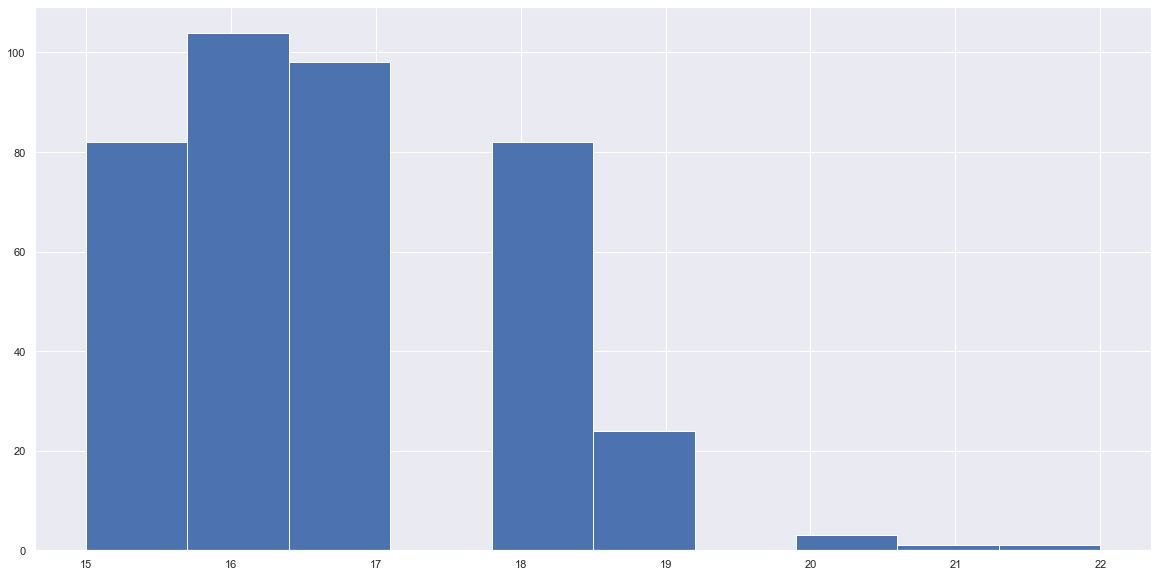

In [48]:
# 3 age — возраст ученика (от 15 до 22)
df.age.hist()
df.age.describe()
display(pd.DataFrame(df.age.value_counts()))
print("Значений, встретившихся в столбце более 5 раз:",
      (df.age.value_counts() > 5).sum())
df.loc[:, ['age']].info()
# основная масса учеников возрастом от 15 до 18 лет

In [72]:
# 4 address — тип адреса ученика ('U' - городской, 'R' - за городом)
pd.DataFrame(df.address.value_counts(dropna=False))
# в основном ученики живут в городе

,address
U,273
R,78
NaN,15


In [73]:
# 5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)
pd.DataFrame(df.famsize.value_counts(dropna=False))

,famsize
GT3,245
LE3,99
NaN,22


In [74]:
# 6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
pd.DataFrame(df.Pstatus.value_counts(dropna=False))
# большая часть родителей живут вместе

,Pstatus
T,296
NaN,38
A,32


In [75]:
# 7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
pd.DataFrame(df.Medu.value_counts(dropna=False))

,Medu
4.0,121
2.0,95
3.0,88
1.0,56
0.0,3
NaN,3


In [56]:
# 8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
df.Fedu = df.Fedu.apply(lambda x: 4 if x == 40 else x)
df.Fedu = df.Fedu.apply(lambda x: df.Fedu.median() if pd.isna(x) else x)
pd.DataFrame(df.Fedu.value_counts(dropna=False))
# есть выброс, скорее всего ошибка при заполнении

,Fedu
2.0,130
3.0,96
4.0,89
1.0,78
0.0,2


In [76]:
# 9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба,
# 'at_home' - не работает, 'other' - другое)
pd.DataFrame(df.Mjob.value_counts(dropna=False))

,Mjob
other,123
services,88
at_home,55
teacher,52
health,32
NaN,16


In [77]:
# 10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения,
# 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
pd.DataFrame(df.Fjob.value_counts(dropna=False))

,Fjob
other,185
services,92
NaN,34
teacher,25
at_home,16
health,14


In [78]:
# 11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы,
# 'course' - образовательная программа, 'other' - другое)
pd.DataFrame(df.reason.value_counts(dropna=False))

,reason
course,129
reputation,94
home,94
other,32
NaN,17


In [80]:
# 12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
pd.DataFrame(df.guardian.value_counts(dropna=False))

,guardian
mother,229
father,83
NaN,30
other,24


In [90]:
# 13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
df.loc[:, 'traveltime'] = df.loc[:, 'traveltime'].apply(lambda x: df.loc[:, 'traveltime'].median() if pd.isna(x) else x)
pd.DataFrame(df.loc[:, 'traveltime'].value_counts(dropna=False))

C:\Users\ST\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,traveltime
1.0,251
2.0,86
3.0,22
4.0,7


In [91]:
# 14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
pd.DataFrame(df.studytime.value_counts(dropna=False))

,studytime
2.0,178
1.0,96
3.0,60
4.0,27
NaN,5


In [92]:
# 15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
pd.DataFrame(df.failures.value_counts(dropna=False))

,failures
0.0,277
1.0,43
NaN,19
3.0,14
2.0,13


In [93]:
# 16 schoolsup — дополнительная образовательная поддержка (yes или no)
pd.DataFrame(df.schoolsup.value_counts(dropna=False))
# основная масса учеников не имеет доп. образовательной поддержки

,schoolsup
no,310
yes,47
NaN,9


In [94]:
# 17 famsup — семейная образовательная поддержка (yes или no)
pd.DataFrame(df.famsup.value_counts(dropna=False))

,famsup
yes,204
no,127
NaN,35


In [95]:
# 18 paid — дополнительные платные занятия по математике (yes или no)
pd.DataFrame(df.paid.value_counts(dropna=False))

,paid
no,189
yes,139
NaN,38


In [96]:
# 19 activities — дополнительные внеучебные занятия (yes или no)
pd.DataFrame(df.activities.value_counts(dropna=False))

,activities
yes,184
no,168
NaN,14


In [97]:
# 20 nursery — посещал детский сад (yes или no)
pd.DataFrame(df.nursery.value_counts(dropna=False))
# основная масса учеников посещали детский сад

,nursery
yes,277
no,73
NaN,16


In [62]:
# granular
pd.DataFrame(df.granular.value_counts())
df.drop(['granular'], inplace=True, axis=1)

C:\Users\ST\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [98]:
# 21 higher — хочет получить высшее образование (yes или no)
pd.DataFrame(df.higher.value_counts(dropna=False))
# почти все ученики хотят получить высшее образование

,higher
yes,332
NaN,18
no,16


In [99]:
# 22 internet — наличие интернета дома (yes или no)
pd.DataFrame(df.internet.value_counts(dropna=False))

,internet
yes,279
no,55
NaN,32


In [100]:
# 23 romantic — в романтических отношениях (yes или no)
pd.DataFrame(df.romantic.value_counts(dropna=False))

,romantic
no,225
yes,111
NaN,30


In [28]:
# 24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
pd.DataFrame(df.famrel.value_counts())
df.famrel = df.famrel.apply(lambda x: 1 if x == -1 else x)
df.famrel = df.famrel.apply(lambda x: df.famrel.median() if pd.isna(x) else x)
pd.DataFrame(df.famrel.value_counts(dropna=False))
# есть один выброс, скорее всего ошибка при заполнении

,famrel
4.0,209
5.0,99
3.0,62
2.0,17
1.0,8


In [69]:
# 25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
pd.DataFrame(df.freetime.value_counts(dropna=False))

,freetime
3.0,143
4.0,106
2.0,57
5.0,36
1.0,15
NaN,9


In [70]:
# 26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
pd.DataFrame(df.goout.value_counts(dropna=False))

,goout
3.0,119
2.0,95
4.0,77
5.0,46
1.0,21
NaN,8


In [71]:
# 27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
pd.DataFrame(df.health.value_counts(dropna=False))

,health
5.0,129
3.0,83
4.0,58
1.0,41
2.0,40
NaN,15


,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


Значений, встретившихся в столбце более 5 раз: 11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  383 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


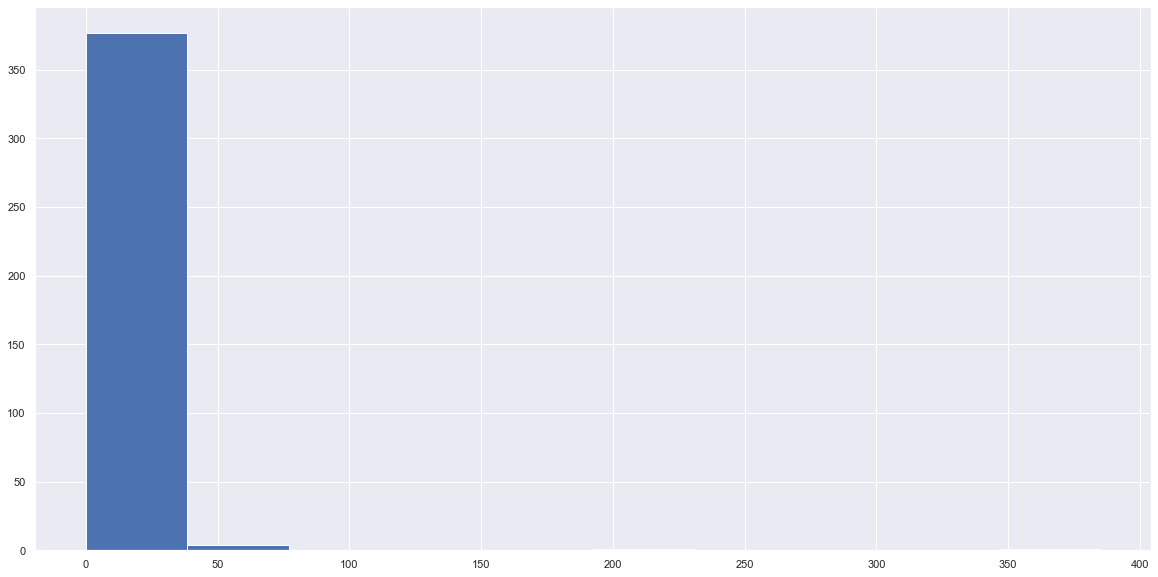

In [49]:
# 28 absences — количество пропущенных занятий
df.absences.hist()
df.absences.describe()
display(pd.DataFrame(df.absences.value_counts()))
print("Значений, встретившихся в столбце более 5 раз:",
      (df.absences.value_counts() > 5).sum())
df.loc[:, ['absences']].info()
# есть 2 ученика, которые отсутствовали довольно много

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


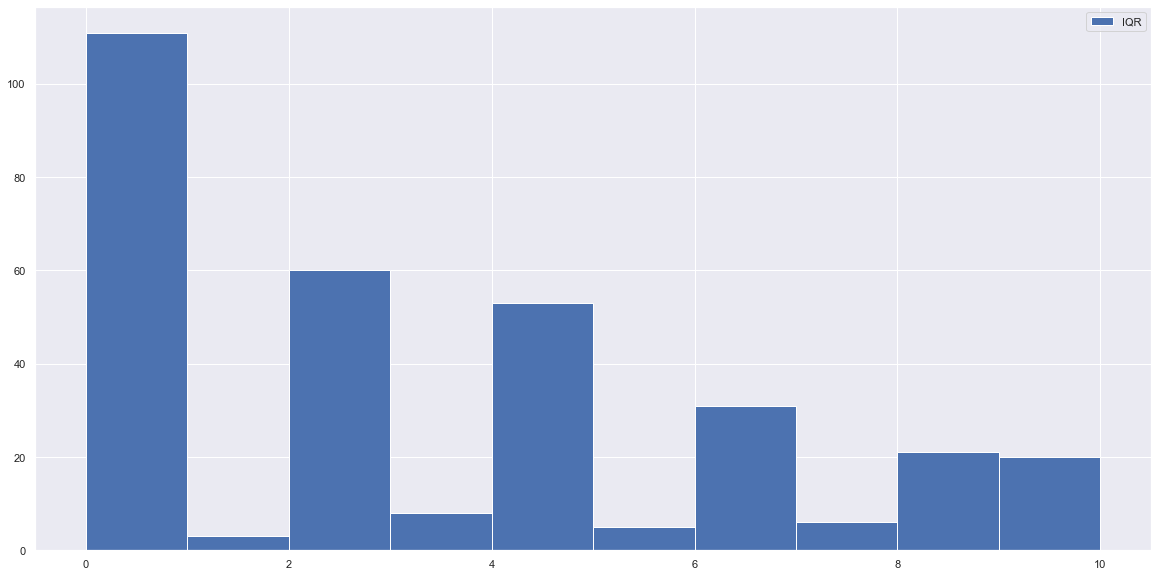

In [50]:
# скорее всего это выбросы, количество пропущенных занятий слишком велико
IQR = df.absences.quantile(0.75) - df.absences.quantile(0.25)
perc25 = df.absences.quantile(0.25)
perc75 = df.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

df.absences.loc[df.absences.between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=10, range=(0, 10), label='IQR')

plt.legend()

In [57]:
df = df.loc[df.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,27
80.0,16


Значений, встретившихся в столбце более 5 раз: 15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   389 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


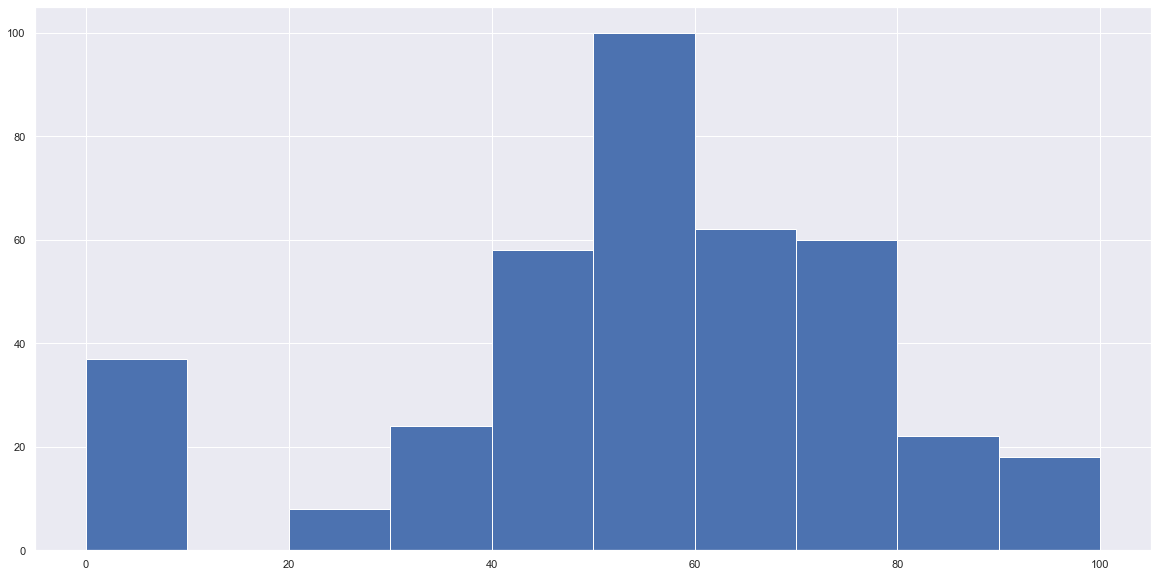

In [51]:
# 29 score — баллы по госэкзамену по математике
df.score.hist()
df.score.describe()
display(pd.DataFrame(df.score.value_counts()))
print("Значений, встретившихся в столбце более 5 раз:",
      (df.score.value_counts() > 5).sum())
df.loc[:, ['score']].info()

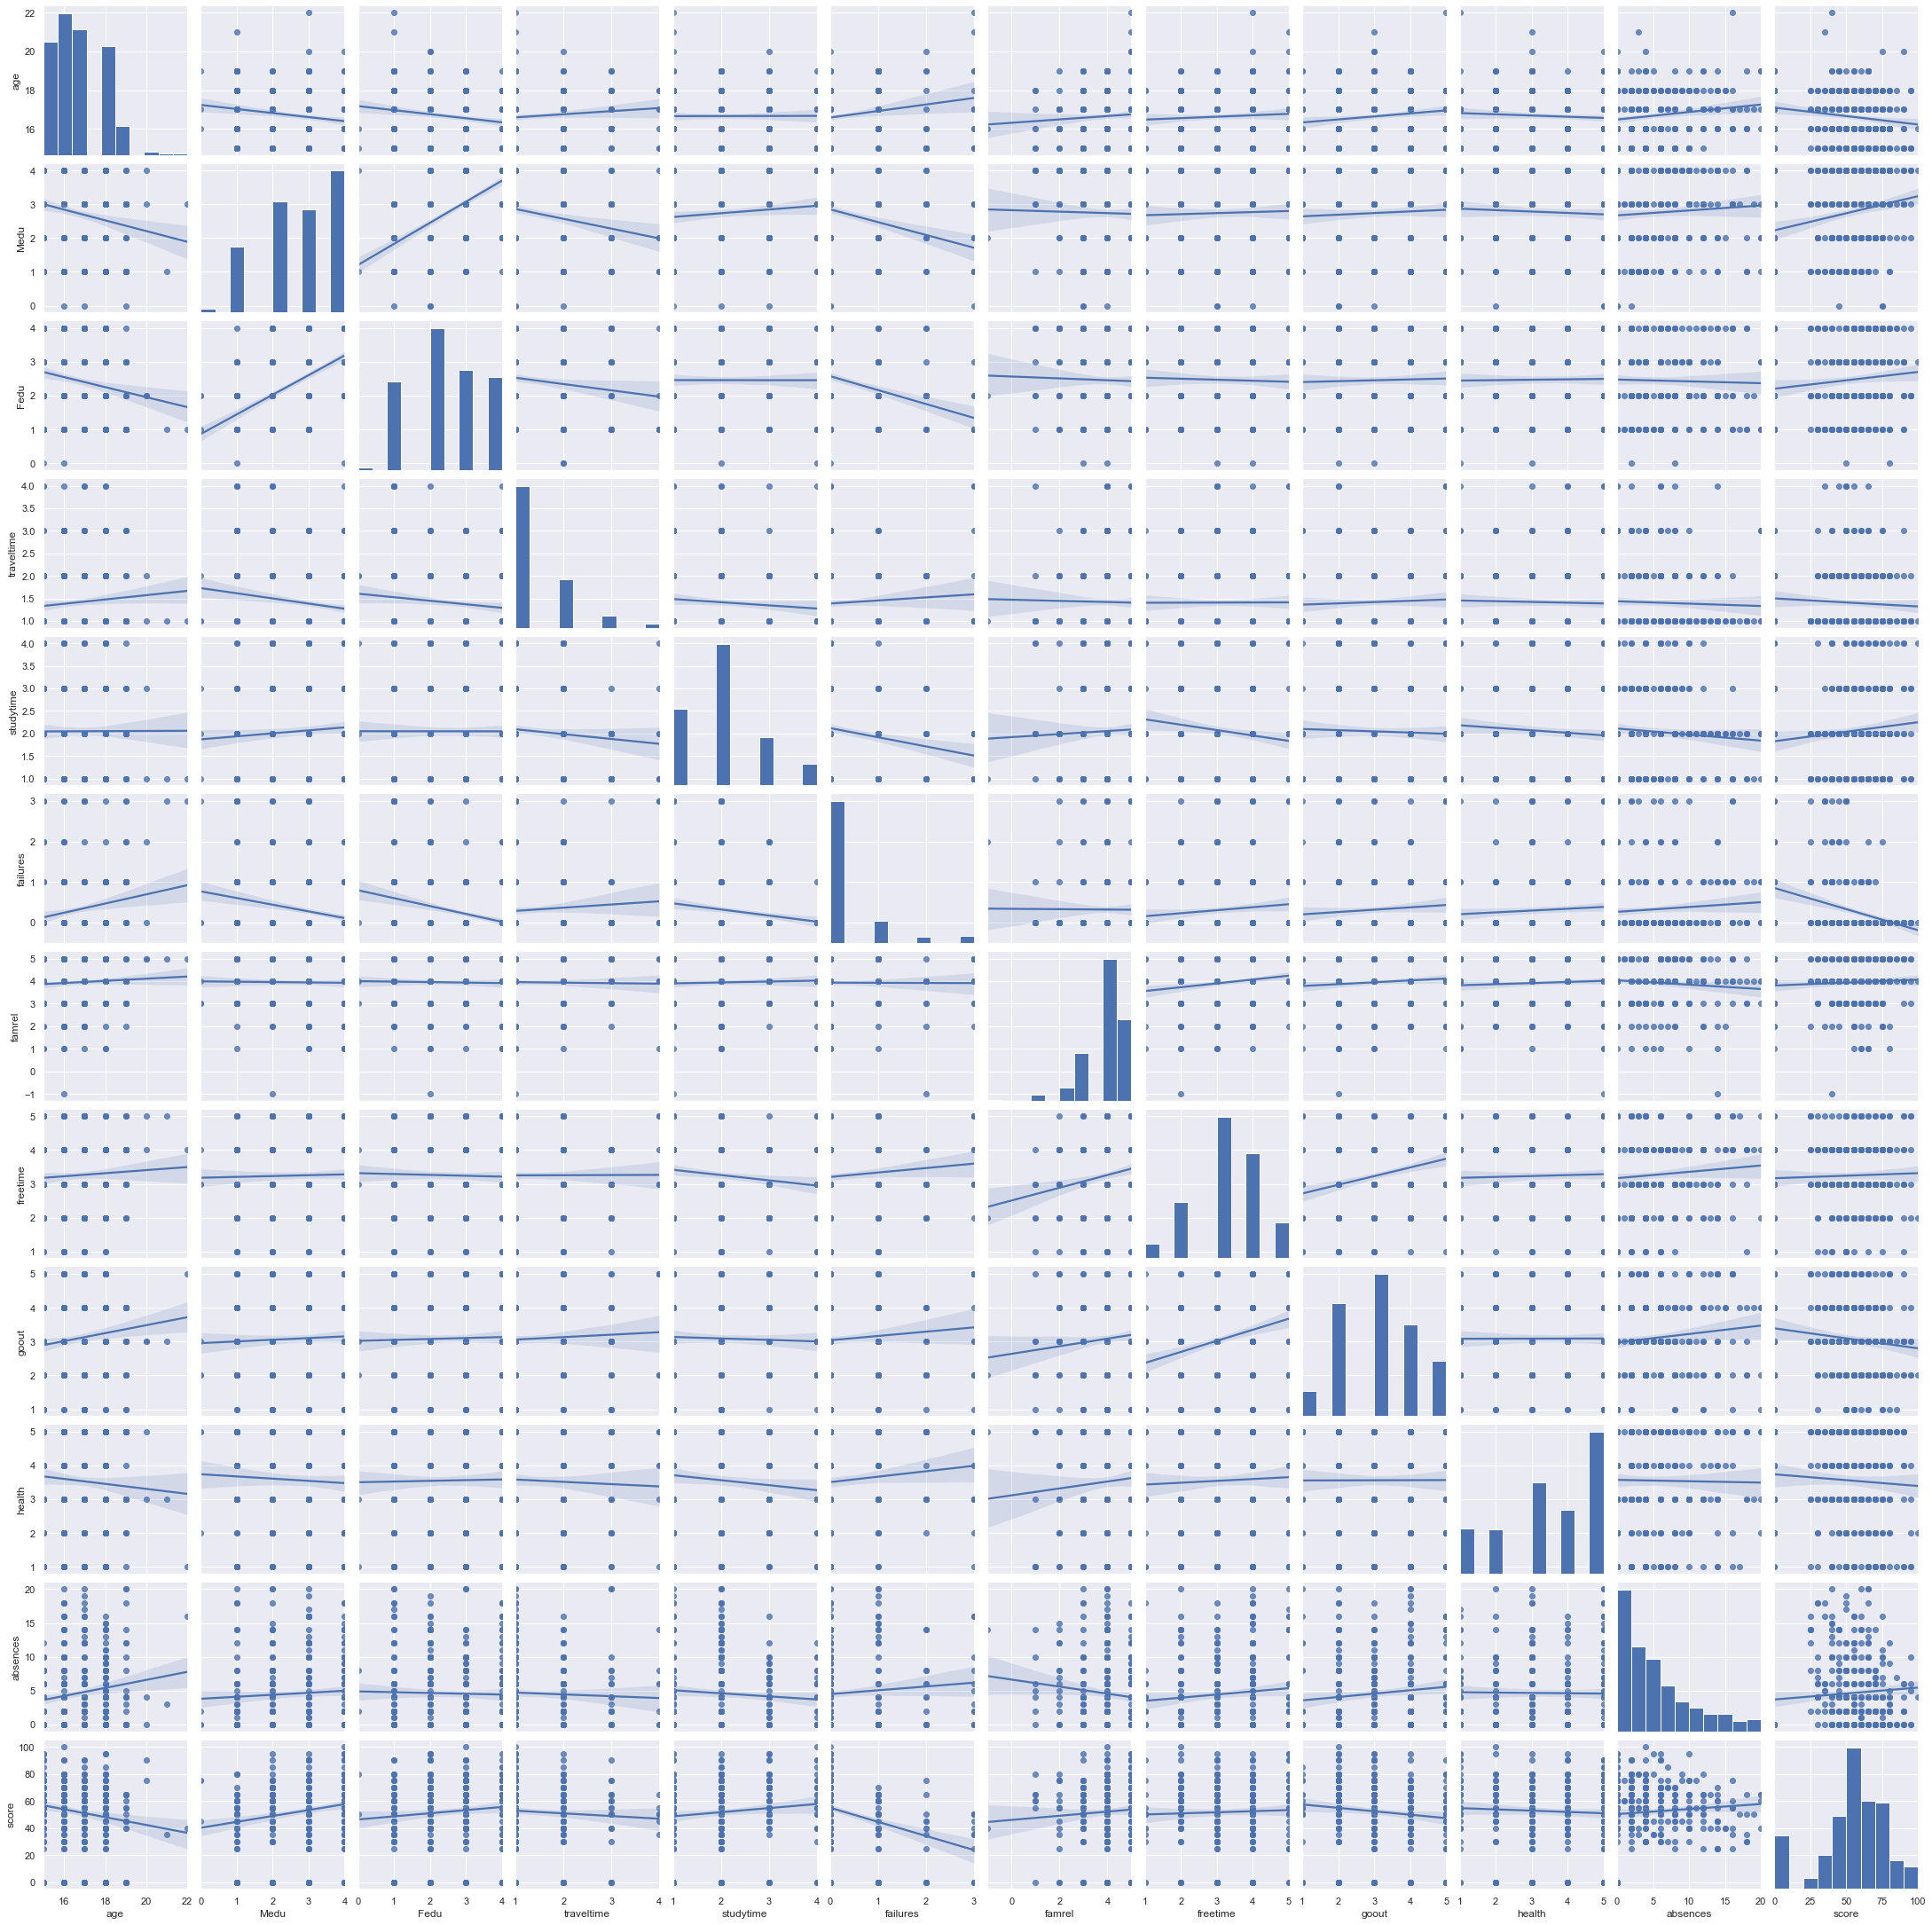

In [101]:
# Проведем корреляционный анализ, какие столбцы коррелируют с оценкой учащихся.
# Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить.
sns.pairplot(df, kind='reg')

In [102]:
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.182463,-0.176088,0.087413,0.003035,0.195400,0.064745,0.058193,0.135466,-0.067958,0.151493,-0.159306
Medu,-0.182463,1.000000,0.600783,-0.181907,0.085532,-0.249754,-0.018456,0.027861,0.049094,-0.052316,0.065712,0.210257
Fedu,-0.176088,0.600783,1.000000,-0.120692,-0.000844,-0.282940,-0.024096,-0.027646,0.027024,0.015812,-0.024968,0.106860
traveltime,0.087413,-0.181907,-0.120692,1.000000,-0.086759,0.073026,-0.017472,0.003261,0.045424,-0.033483,-0.037625,-0.059351
studytime,0.003035,0.085532,-0.000844,-0.086759,1.000000,-0.174802,0.036920,-0.136510,-0.034197,-0.090552,-0.078099,0.113113
failures,0.195400,-0.249754,-0.282940,0.073026,-0.174802,1.000000,-0.005688,0.098642,0.085448,0.084991,0.081801,-0.329542
famrel,0.064745,-0.018456,-0.024096,-0.017472,0.036920,-0.005688,1.000000,0.178930,0.096306,0.070839,-0.100241,0.063205
freetime,0.058193,0.027861,-0.027646,0.003261,-0.136510,0.098642,0.178930,1.000000,0.289474,0.038437,0.093436,0.034952
goout,0.135466,0.049094,0.027024,0.045424,-0.034197,0.085448,0.096306,0.289474,1.000000,0.002320,0.111587,-0.122246
health,-0.067958,-0.052316,0.015812,-0.033483,-0.090552,0.084991,0.070839,0.038437,0.002320,1.000000,-0.014358,-0.057202


In [38]:
# Анализ номинативных переменных с помощью box-plot.
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (10, 5))
    sns.boxplot(x=column, y='score', 
                data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:5])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

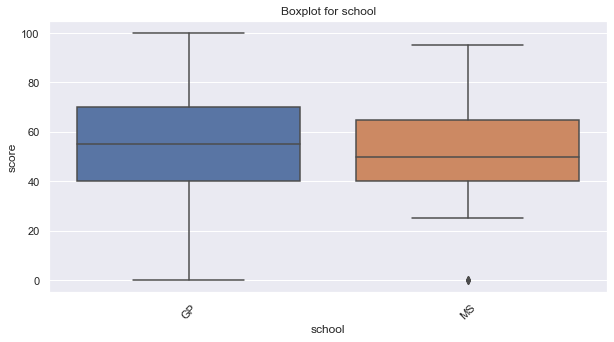

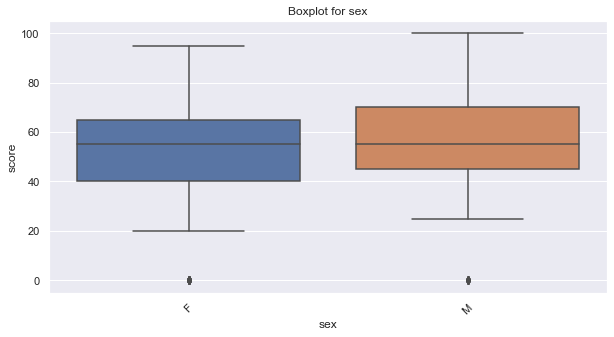

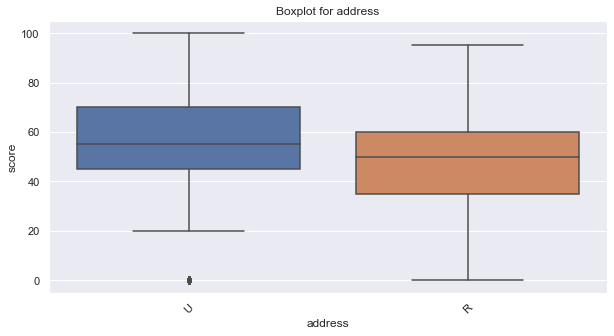

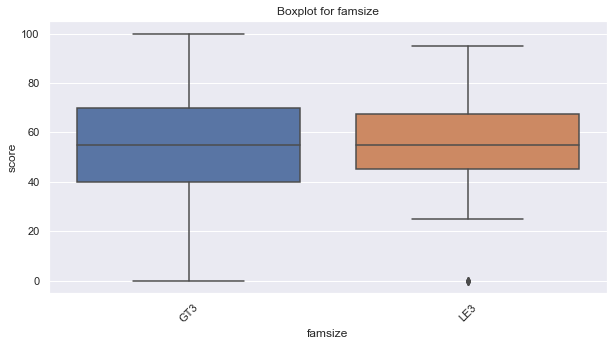

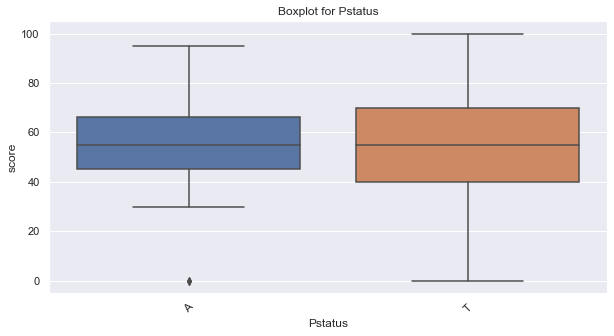

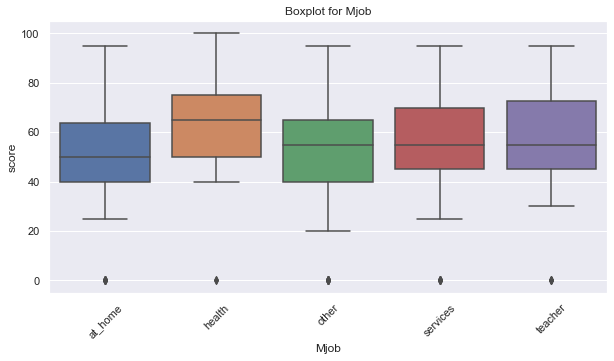

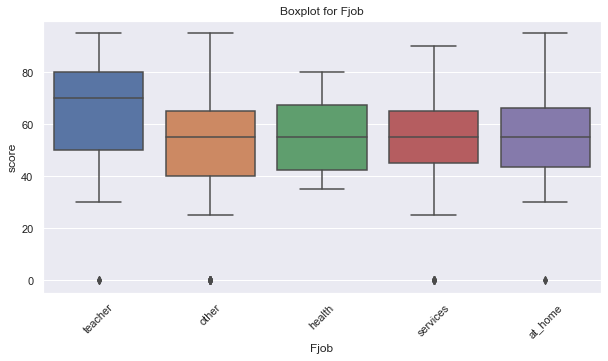

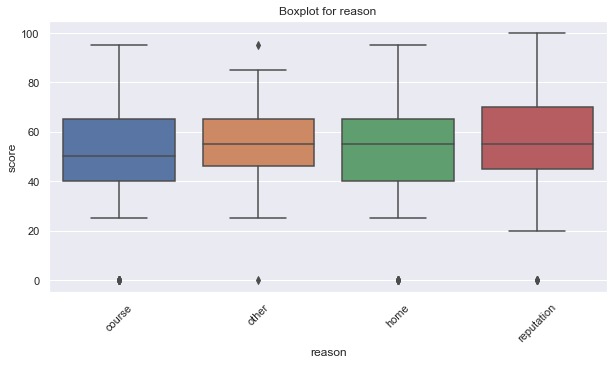

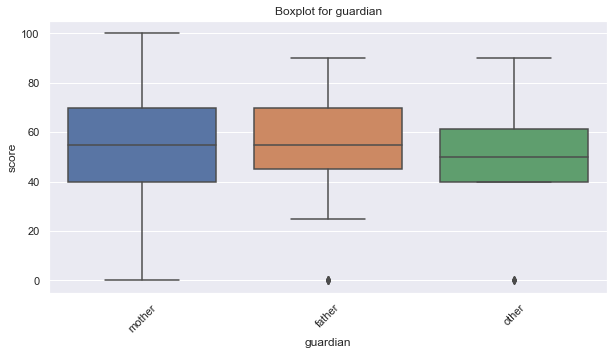

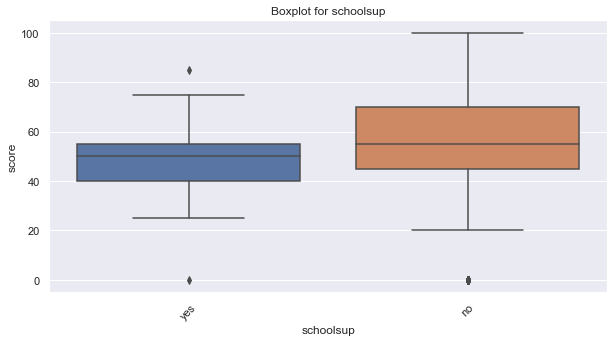

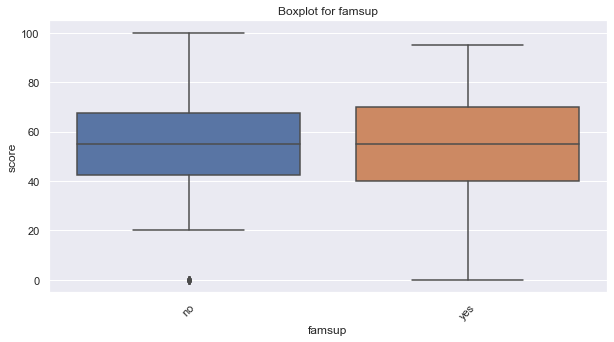

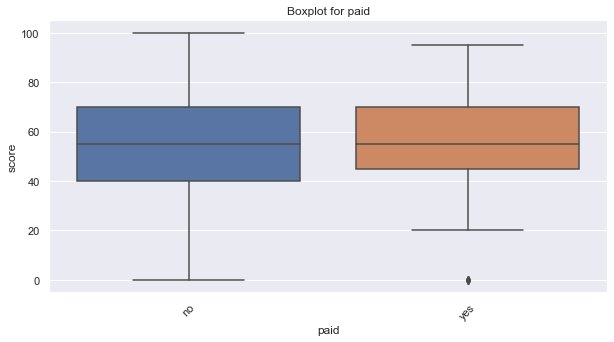

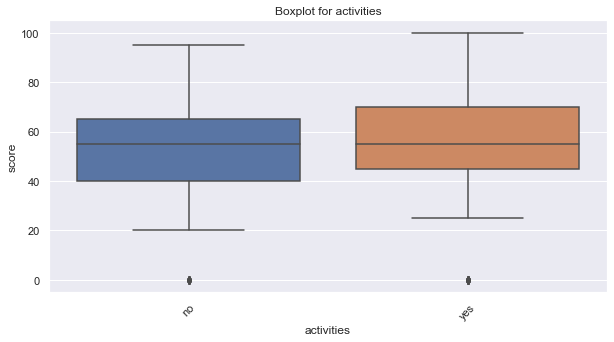

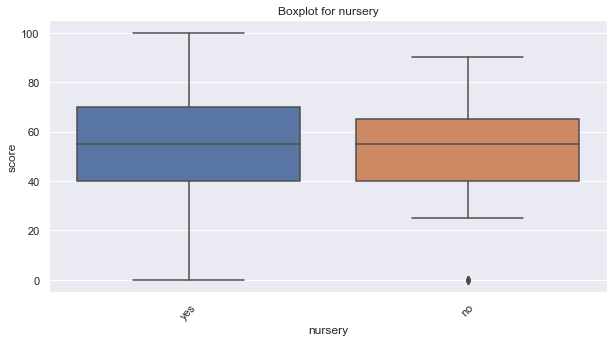

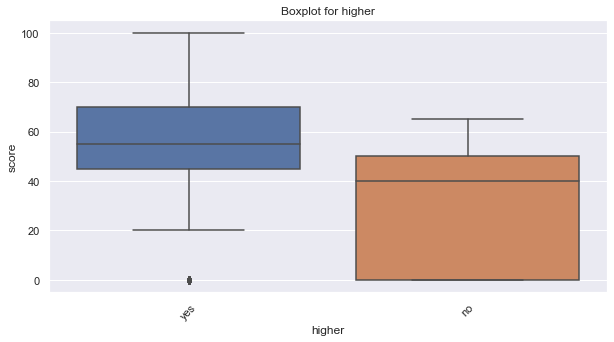

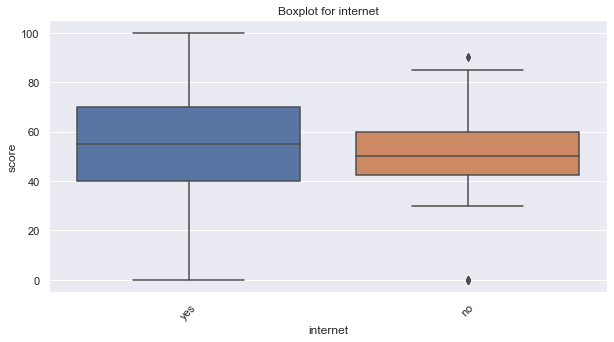

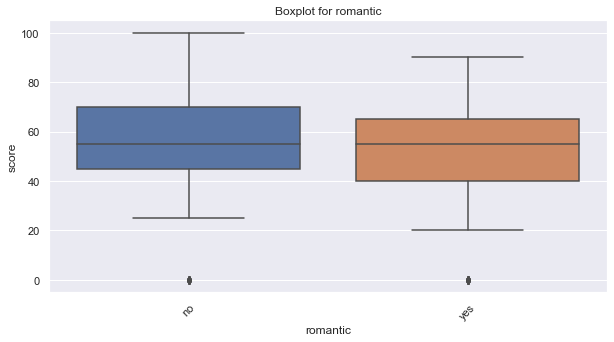

In [54]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

In [67]:
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:5]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'],
                     df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [68]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки Mjob


In [ ]:
# Отчет по результатам анализа.
# В данных не большое количество пустых значений
# Выбросы найдены в столбце absences — количество пропущенных занятий, в стобцах famrel и Fedu было по 1 ошибке при заполнении,
# при таком количестве информации, можно сделать вывод, что данные достаточно чистые
# параметры, которые будут использовать в дальнейшем для построения модели
# 1. age - с увеличением возраста, показатели по учебе падают
# 2. Medu и Fedu - чем лучше образование у родителей, тем выше балл у ребенка
# 3. failures - при большем количестве неудач показатель учебы падает
# 4. goout - долгое времепровождение с друзьями тоже влият на итоговый балл
# 5. Mjob
# 6. traveltime, studytime, famrel, freetime, health, absences - не удаляются, будут наблюдаться и далее в работе над проектом  